# ROLAP DEMO
* This script demonstrates basic OLAP operations using pandas 
* ROLAP ,MOLAP and HOLAP

In [17]:
# Required Packages and Libraries
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Database Connection
def create_connection(db_file):
    conn = sqlite3.connect(db_file)
    return conn


In [19]:
# Creating Sample Dataset
employees = pd.DataFrame({
    'emp_id' : [1, 2, 3, 4, 5, 6],
    'name' : ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank'],
    'age' : [25, 30, 35, 40, 45, 50],
    'salary': [50000, 60000, 70000, 80000, 90000, 100000],
    'dept_id': [1, 2, 3, 4, 5, 6]  # Added dept_id to link with departments
})

departments = pd.DataFrame({
    'dept_id': [1, 2, 3, 4, 5, 6],
    'dept_name' : ['HR', 'Engineering', 'Sales', 'Marketing', 'Finance', 'Support']
})

In [20]:
# Loading Data into SQLite
conn = create_connection(":memory:")
employees.to_sql('employees', conn, if_exists='replace', index=False)
departments.to_sql('departments', conn, if_exists='replace', index=False)   

print("Tables created : employees and departments")

Tables created : employees and departments


# Performing OLAP Operations

## ROLAP Operations

In [21]:
# ROLAP Operarions
query = """
SELECT d.dept_name, AVG(e.salary) as avg_salary
FROM employees e
JOIN departments d ON e.emp_id = d.dept_id
GROUP BY d.dept_name

"""

rolap_result = pd.read_sql_query(query, conn)
print("\nROLAP Query Results: (SQL Aggregation)")
print(rolap_result)


ROLAP Query Results: (SQL Aggregation)
     dept_name  avg_salary
0  Engineering     60000.0
1      Finance     90000.0
2           HR     50000.0
3    Marketing     80000.0
4        Sales     70000.0
5      Support    100000.0


### Data Visualisation

#### ROLAP By Department

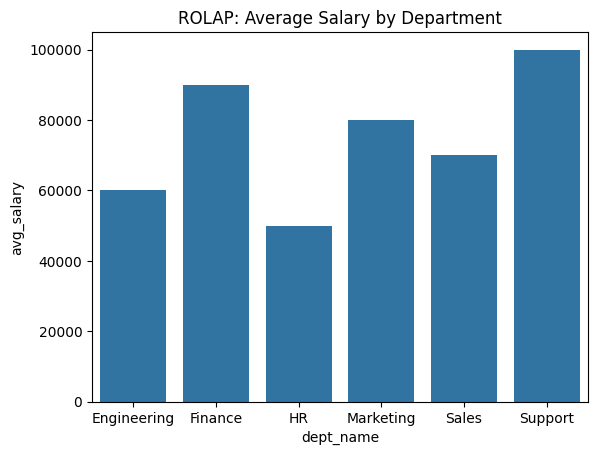

In [22]:
sns.barplot(x='dept_name', y='avg_salary', data=rolap_result)
plt.title('ROLAP: Average Salary by Department')
plt.show()

## MOLAP Operations


In [23]:
molap_cube = pd.pivot_table(
    
    employees.merge(departments, on = 'dept_id'),
    values='salary',
    index=['dept_name'],
    columns=['age'],
    aggfunc=np.mean,    
    fill_value=0
)

print("\nMOLAP Cube: (Department vs Age")
print(molap_cube)




MOLAP Cube: (Department vs Age
age               25       30       35       40       45        50
dept_name                                                         
Engineering      0.0  60000.0      0.0      0.0      0.0       0.0
Finance          0.0      0.0      0.0      0.0  90000.0       0.0
HR           50000.0      0.0      0.0      0.0      0.0       0.0
Marketing        0.0      0.0      0.0  80000.0      0.0       0.0
Sales            0.0      0.0  70000.0      0.0      0.0       0.0
Support          0.0      0.0      0.0      0.0      0.0  100000.0


/var/folders/kw/410yfyf16jl9_7z_msy08s900000gn/T/ipykernel_81812/1882639913.py:1: FutureWarning: The provided callable <function mean at 0x10bf28d60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  molap_cube = pd.pivot_table(


#### Visualisation: MOLAP Cube Heatmap

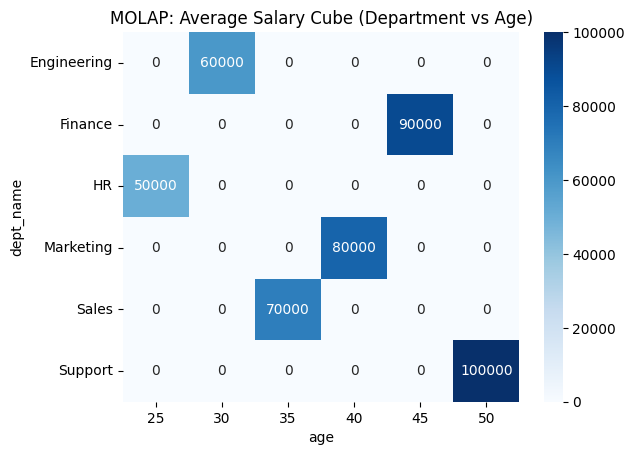

In [24]:
sns.heatmap(molap_cube, annot=True, fmt=".0f", cmap="Blues")
plt.title('MOLAP: Average Salary Cube (Department vs Age)')
plt.show()

## HOLAP Operations
* Combining ROLAP and MOLAP Operations

In [25]:
detail_sql = """
SELECT e.name,d.dept_name, e.salary
FROM employees e
JOIN departments d ON e.dept_id = d.dept_id

"""
detail_df = pd.read_sql_query(detail_sql, conn)

# Pandas MOLAP Aggregation
holap_summary = detail_df.groupby('dept_name')['salary'].mean().reset_index()
print(holap_summary)


     dept_name    salary
0  Engineering   60000.0
1      Finance   90000.0
2           HR   50000.0
3    Marketing   80000.0
4        Sales   70000.0
5      Support  100000.0


#### Visualisation: HOLAP Summary

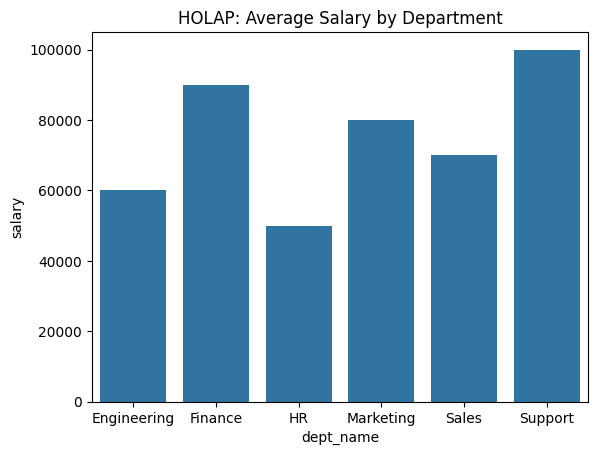

In [26]:
sns.barplot(x='dept_name', y='salary', data=holap_summary)
plt.title('HOLAP: Average Salary by Department')
plt.show()

# OLAP Operations Demonstrations
## Slice

In [27]:
slice_df = detail_df[detail_df['dept_name'] == 'IT']
print("\nSlice : IT Department")
print(slice_df)


Slice : IT Department
Empty DataFrame
Columns: [name, dept_name, salary]
Index: []


## Dice


In [28]:
dice_df = detail_df[(detail_df['dept_name']==('HR')) & (detail_df['salary'] > 60000)]
print("\nDice : HR Department with Salary > 60000")
print(dice_df)  


Dice : HR Department with Salary > 60000
Empty DataFrame
Columns: [name, dept_name, salary]
Index: []


## Drill Down

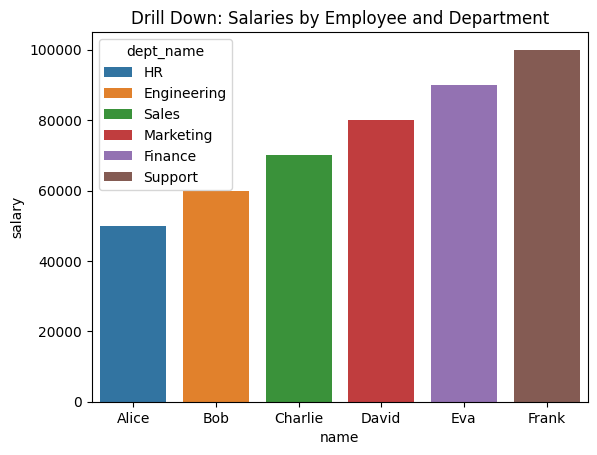

In [29]:
sns.barplot(data = detail_df, x = 'name', y = 'salary', hue = 'dept_name')
plt.title('Drill Down: Salaries by Employee and Department')
plt.show()

## Rollup

In [30]:
rollup_df = detail_df.groupby('dept_name')['salary'].sum().reset_index()
print("\nRollup : Total Salary by Department")
print(rollup_df)


Rollup : Total Salary by Department
     dept_name  salary
0  Engineering   60000
1      Finance   90000
2           HR   50000
3    Marketing   80000
4        Sales   70000
5      Support  100000


### Visualisation

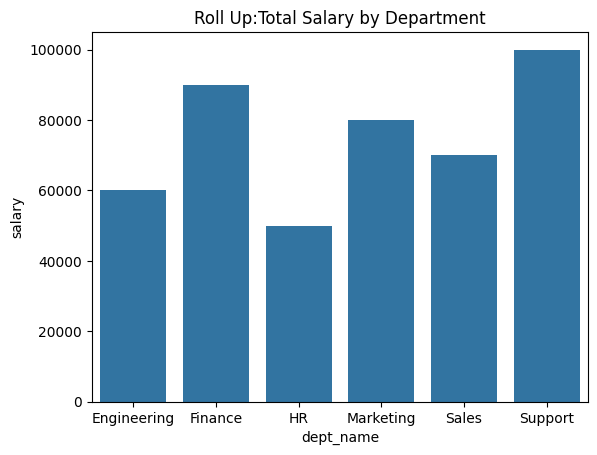

In [31]:
sns.barplot(data = rollup_df, x='dept_name', y='salary',)
plt.title('Roll Up:Total Salary by Department')
plt.show()

# Close Database Connection


In [ ]:
conn.close

<function Connection.close()>

# Data Extraction

## Required Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import datetime
import random

## Simulating Data

In [8]:
customers = ['Amazon', 'Walmart', 'Target', 'BestBuy', 'Costco', 'Ebay']
data = []

# For loop to generate data 
start_date = datetime.date(2025, 4, 1)
for i in range(60):  
    date = start_date + datetime.timedelta(days=i)
    for j in range(random.randint(3,6)):  # 3 to 6 transactions per day
        data.append({  
            'id': random.randint(1000,9999),  
            'customer': random.choice(customers),
            'date': date.isoformat(), 
            'amount': round(random.randint(100,2000)),  
            'last_updated': (date + datetime.timedelta(  
                hours=random.randint(0,23),
                minutes=random.randint(0,59), 
                seconds=random.randint(0,59)
            )).isoformat()  
        }) 

df = pd.DataFrame(data)
df.to_csv('sales_data.csv', index=False)  
df.head()

,id,customer,date,amount,last_updated
0,3777,Costco,2025-04-01,1545,2025-04-01
1,9582,Target,2025-04-01,1257,2025-04-01
2,1731,Amazon,2025-04-01,2000,2025-04-01
3,6560,BestBuy,2025-04-02,723,2025-04-02
4,8179,Costco,2025-04-02,1704,2025-04-02


## Extracting the Data

### Full Data Extraction from Realistic Sales data

In [11]:
df_full=pd.read_csv('sales_data.csv', parse_dates=['date', 'last_updated'])
print("Full Data Extracted")
df_full.head()

Full Data Extracted


,id,customer,date,amount,last_updated
0,3777,Costco,2025-04-01,1545,2025-04-01
1,9582,Target,2025-04-01,1257,2025-04-01
2,1731,Amazon,2025-04-01,2000,2025-04-01
3,6560,BestBuy,2025-04-02,723,2025-04-02
4,8179,Costco,2025-04-02,1704,2025-04-02


### Incremental Data Extraction
#### Simulate Last Extraction Date

In [12]:
last_extraction_date = datetime.datetime(2025, 5, 15, 0, 0, 0)
df_incremental = df_full[df_full['last_updated'] > last_extraction_date]
print(f"Incremental Data Extracted after {last_extraction_date}")
df_incremental.head()

Incremental Data Extracted after 2025-05-15 00:00:00


,id,customer,date,amount,last_updated
191,8222,Amazon,2025-05-16,540,2025-05-16
192,8001,Ebay,2025-05-16,1595,2025-05-16
193,1657,Amazon,2025-05-16,607,2025-05-16
194,6513,Ebay,2025-05-16,757,2025-05-16
195,5419,Costco,2025-05-16,293,2025-05-16
